# Bienvenue sur notre projet de modélisation de la magnétopause terrestre par regression symbolique

Import des librairies :

In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from pysr import PySRRegressor

rd.seed(1234)

## Installation de PySR avec conda

In [2]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda config --set channel_priority strict


Note: you may need to restart the kernel to use updated packages.


# Load des données :

In [4]:
file_path = 'Test_shue_nose.pkl'
file = open(file_path, 'rb')

data = pkl.load(file)

file.close()

Nom des variables données :

In [5]:
Pd = data['Pd']
Bz = data['Bz']
r0_98 = data['r0_shue_1998']
r0_97 = data['r0_shue_1997']

data = np.array(data)

# Piste de recherches : 

Tracer Histogrammes en fonction des cycles solaires

Après sélection de données, tracer distribution

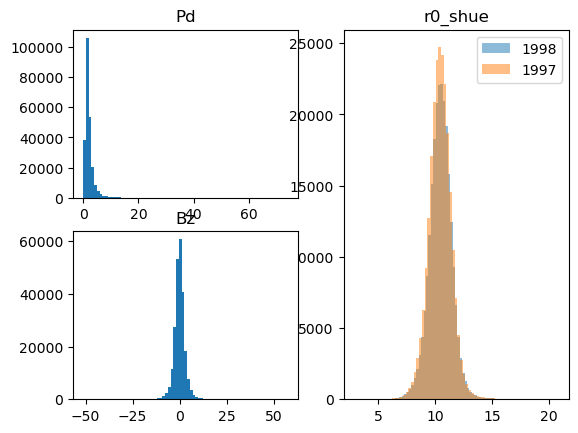

Moyenne de Bz :  -0.05384924095899269


In [6]:
nb_bins = 75

plt.figure()
plt.subplot(2,2,1)
plt.hist(Pd,bins=nb_bins)
plt.title('Pd')
plt.subplot(1,2,2)
plt.hist(r0_98,bins=nb_bins,label='1998',alpha=0.5)
plt.hist(r0_97,bins=nb_bins,label='1997',alpha=0.5)
plt.title('r0_shue')
plt.legend()
plt.subplot(2,2,3)
plt.hist(Bz,bins=nb_bins)
plt.title('Bz')
plt.show()

print('Moyenne de Bz : ', Bz.mean()) #On s'attend à une moyenne négative

Sélection aléatoire de points

In [7]:
nb_observations = len(data[:,0])
nb_points_select = 5000
nb_points_training = int(4/5*nb_points_select)
nb_points_test = int(1/5*nb_points_select)

pts_retenus = np.arange(nb_observations)
rd.shuffle(pts_retenus)
pts_retenus = pts_retenus[:nb_points_select]
print(pts_retenus,len(pts_retenus))

selected_data = data[pts_retenus,:]
print(selected_data)

[ 23579  60200 160128 ... 182636 135352 183865] 5000
[[ 2.7395     -3.22466667  9.56832872  9.39815579]
 [ 2.64973611  1.86300463  9.87539954  9.85609571]
 [ 0.69943519 -0.56115278 11.99286738 11.95156357]
 ...
 [ 0.47083333  7.8915873  12.89361701 12.89321544]
 [ 2.32775926 -2.80772222  9.8472404   9.68431907]
 [ 2.67988095  0.93512566  9.83702285  9.82882808]]


Vérification de la validité de notre sélection de données : 

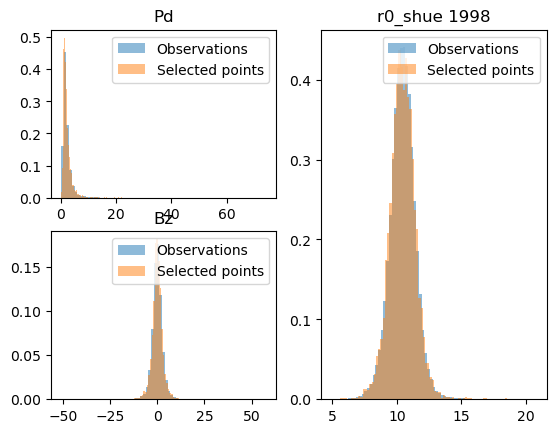

In [8]:
plt.figure()
plt.subplot(2,2,1)
plt.hist(Pd,bins=nb_bins,density=True,label='Observations',alpha=0.5)
plt.hist(selected_data[:,0],bins=nb_bins,density=True,label='Selected points',alpha=0.5)
plt.legend()
plt.title('Pd')
plt.subplot(1,2,2)
plt.hist(r0_98,bins=nb_bins,label='Observations',alpha=0.5,density=True)
plt.hist(selected_data[:,2],bins=nb_bins,label='Selected points',alpha=0.5,density=True)
plt.title('r0_shue 1998')
plt.legend()
plt.subplot(2,2,3)
plt.hist(Bz,bins=nb_bins,density=True,label='Observations',alpha=0.5)
plt.hist(selected_data[:,1],bins=nb_bins,density=True,label='Selected points',alpha=0.5)
plt.title('Bz')
plt.legend()
plt.show()

Définition du test set et training set

In [9]:
test_set = selected_data[:nb_points_test,:]
print(len(test_set),'=',nb_points_test)
training_set = selected_data[nb_points_test:,:]
print(len(training_set),'=',nb_points_training)

X = training_set[:,0:2]
y = training_set[:,2]

1000 = 1000
4000 = 4000


Puisque PySR va automatiquement utiliser Julia pour le printing, il faut rediriger le printig vers colab.

In [10]:
def init_colab_printing():
    from pysr.julia_helpers import init_julia
    from julia.tools import redirect_output_streams

    julia_kwargs = dict(optimize=3, threads="auto", compiled_modules=False)
    init_julia(julia_kwargs=julia_kwargs)
    redirect_output_streams()


init_colab_printing()

Premier jet de regression

In [11]:
model = PySRRegressor()

model.fit(X,y)

/home/abouir/.local/lib/python3.11/site-packages/pysr/sr.py:1281: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/home/abouir/.local/lib/python3.11/site-packages/pysr/julia_helpers.py:240: UserWarning: Julia has already started. The new Julia options {'threads': 16} will be ignored.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.940e+04
Head worker occupation: 81.1%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 90 / 600 total iterations (15.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.020e+00  1.594e+01  y = 10.433
5           3.369e-01  2.769e-01  y = ((x₀ * -0.51675) + 11.535)
9           1.257e-01  2.465e-01  y = ((2.9738 * 2.9738) + (2.9738 / (x₀ + 0.23402)))
11          1.217e-01  1.597e-02  y = ((2.9738 * 2.9738) + (2.9738 / ((x₀ - -0.16031) + 0.10277)...
                                  ))
13          6.447e-02  3.179e-01  y = ((2.4902 * 2.9738) + (((2.9738 + 2.9738) / (x₀ - -0.70387)...
                                  ) + 0.52182))
15          6.038e-02  3.276e-02  y = ((((0.95978 + 0.53815) - -6.4031) / ((x₀ - -1.1227) + (-0....
                      

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 5.130e+04
Head worker occupation: 89.1%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 590 / 600 total iterations (98.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.020e+00  1.594e+01  y = 10.433
3           9.341e-01  4.388e-02  y = (12.565 - x₀)
5           3.369e-01  5.099e-01  y = ((x₀ * -0.51675) + 11.535)
7           3.369e-01  -0.000e+00  y = ((12.623 - 1.0877) + (x₀ * -0.51676))
9           6.038e-02  8.596e-01  y = (((0.37383 - -7.5235) / (x₀ - -1.0401)) - -7.5465)
11          3.586e-02  2.605e-01  y = ((((0.15957 * x₁) - -7.5465) / (x₀ - -0.94279)) - -7.5465)
13          3.255e-02  4.835e-02  y = ((((-0.066449 - -7.5465) / (x₀ - -0.92871)) - -7.5465) - (...
                         

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          10.433281   
	1        4.387921e-02                                   (12.564892 - x0)   
	2        5.099119e-01                   ((x0 * -0.51675177) + 11.534798)   
	3        4.452499e-08     ((12.622511 - 1.0877165) + (x0 * -0.51675636))   
	4        8.595750e-01  (((0.3738262 - -7.5234694) / (x0 - -1.0400857)...   
	5  >>>>  2.605082e-01  ((((0.1595719 * x1) - -7.5464783) / (x0 - -0.9...   
	6        4.834753e-02  ((((-0.06644854 - -7.5464783) / (x0 - -0.92871...   
	7        2.333086e-02  ((((-0.13806106 - -7.5464783) / (x0 - -0.92871...   
	8        1.176931e-02  ((((-0.13806106 - -7.5464783) / (x0 - -0.92871...   
	9        1.316365e-03  ((((-0.13806106 - -7.5464783) / (x0 - -0.92871...   
	
	       loss  complexity  
	0  1.019775           1  
	1  0.934095           3  
	2  0.336889           5  
	3  0.336889           7  
	4  0.060377           9  
	5  0.035859          11  
	6  0.032554          13  
	7  0.031070          15  
	8  0.030347          17  
	9  0.030267          19  
]

Le score est défini par:
$$\text{score} = - \log(\text{loss}_i/\text{loss}_{i-1})/
(\text{complexity}_i - \text{complexity}_{i-1})$$

In [12]:
model.sympy()

7.5464783 + (0.1595719*x1 + 7.5464783)/(x0 + 0.9427854)

On affiche la 7e equation proposée lors de la régression

In [13]:
model.sympy(7)

0.06644854*x1 + 7.60463163019144 + 7.40841724/(x0 + 0.9287147)